#  WeRateDogs 推特数据清理与分析
## 收集

In [67]:
# 导入需要的库
import numpy as np
import pandas as pd
import tweepy
import requests
import json
import os

> 提示：你需要收集的文件有：
1. 收集手头文件 `twitter_archive_enhanced.csv`，其中包含了一些主要的推特信息，是本次清洗的主要数据，其中的评分、地位和名字等数据是从 `text` 原文中提取的，但是提取的并不好，评分并不都是正确的，狗的名字和地位也有不正确的 。**如果你想用评分、地位和名字进行分析和可视化，需要评估和清洗这些列。完成这些列的评估和清洗，你可以学到更加实用的技能。**
2. 编程下载收集互联网文件：`image-predictions.tsv`，其中包含了推特图像预测信息，根据推特中的图片预测出狗狗种类；
3. 查询 API 收集额外推特信息 `tweet_json.txt`，如果你无法访问 Twitter 的话，可以直接读取项目可供下载的 `tweet_json.txt` 文件，从中提取所需数据。至少需要提取转发数（`retweet_count`）和喜欢数（`favorite_count`）这两列，**如果你的分析中不需要用到其他列，则不需要收集其他列**。如果提取了其他列只用于清洗，那么这样的清洗没有意义。

In [68]:
# 收集文件 1 保存为 dataframe
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [69]:
# 收集文件 2 保存为 dataframe
url = 'https://static-documents.s3.cn-north-1.amazonaws.com.cn/nd002/image-predictions.tsv'
r = requests.get(url)
with open('image-predictions.tsv' , mode = 'wb') as file:
    file.write(r.content)


In [70]:
images_df = pd.read_csv('image-predictions.tsv', sep = '\t')
images_df.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [11]:
##从url中下载图片, 可以具体查看图片情况
from PIL import Image
from io import BytesIO

#给出存放图片的文件夹
folder = 'dog_images'
if not os.path.exists(folder):
    os.makedirs(folder)
    
#编程下载    
for url in images_df.jpg_url:
    r = requests.get(url)
    i = Image.open(BytesIO(r.content))
    
    try:
        i.save(folder + '/' + url.split('/')[-1])
    except Exceptions as e:
        print('Can not download image')
    break
    

In [71]:
# 收集文件 3 保存为 dataframe
list_df = []
with open('tweet_json.txt') as file:
    for line in file:
        list_df.append(json.loads(line))
        
tweet_df = pd.DataFrame(list_df)

In [72]:
tweet_df.head()

contributors coordinates                      created_at display_text_range  \
0         None        None  Tue Aug 01 16:23:56 +0000 2017            [0, 85]   
1         None        None  Tue Aug 01 00:17:27 +0000 2017           [0, 138]   
2         None        None  Mon Jul 31 00:18:03 +0000 2017           [0, 121]   
3         None        None  Sun Jul 30 15:58:51 +0000 2017            [0, 79]   
4         None        None  Sat Jul 29 16:00:24 +0000 2017           [0, 138]   

                                            entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   
1  {'hashtags': [], 'symbols': [], 'user_mentions...   
2  {'hashtags': [], 'symbols': [], 'user_mentions...   
3  {'hashtags': [], 'symbols': [], 'user_mentions...   
4  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   

                                   extended_entities  favorite_count  \
0  {'media': [{'id': 892420639486877696, 'id_str'...           39492   
1  {'media': [{'id': 892177413194625024, 'id_str'...           33786   
2  {'media': [{'id': 891815175371796480, 'id_str'...           25445   
3  {'media': [{'id': 891689552724799489, 'id_str'...           42863   
4  {'media': [{'id': 891327551943041024, 'id_str'...           41016   

   favorited                                          full_text   geo  ...  \
0      False  This is Phineas. He's a mystical boy. Only eve...  None  ...   
1      False  This is Tilly. She's just checking pup on you....  None  ...   
2      False  This is Archie. He is a rare Norwegian Pouncin...  None  ...   
3      False  This is Darla. She commenced a snooze mid meal...  None  ...   
4      False  This is Franklin. He would like you to stop ca...  None  ...   

   possibly_sensitive_appealable quoted_status quoted_status_id  \
0                          False           NaN              NaN   
1                          False           NaN              NaN   
2                          False           NaN              NaN   
3                          False           NaN              NaN   
4                          False           NaN              NaN   

   quoted_status_id_str retweet_count  retweeted retweeted_status  \
0                   NaN          8842      False              NaN   
1                   NaN          6480      False              NaN   
2                   NaN          4301      False              NaN   
3                   NaN          8925      False              NaN   
4                   NaN          9721      False              NaN   

                                              source truncated  \
0  <a href="http://twitter.com/download/iphone" r...     False   
1  <a href="http://twitter.com/download/iphone" r...     False   
2  <a href="http://twitter.com/download/iphone" r...     False   
3  <a href="http://twitter.com/download/iphone" r...     False   
4  <a href="http://twitter.com/download/iphone" r...     False   

                                                user  
0  {'id': 4196983835, 'id_str': '4196983835', 'na...  
1  {'id': 4196983835, 'id_str': '4196983835', 'na...  
2  {'id': 4196983835, 'id_str': '4196983835', 'na...  
3  {'id': 4196983835, 'id_str': '4196983835', 'na...  
4  {'id': 4196983835, 'id_str': '4196983835', 'na...  

[5 rows x 31 columns]

In [98]:
tweet_df.id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
5       891087950875897856
6       890971913173991426
7       890729181411237888
8       890609185150312448
9       890240255349198849
10      890006608113172480
11      889880896479866881
12      889665388333682689
13      889638837579907072
14      889531135344209921
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
19      888078434458587136
20      887705289381826560
21      887517139158093824
22      887473957103951883
23      887343217045368832
24      887101392804085760
25      886983233522544640
26      886736880519319552
27      886680336477933568
28      886366144734445568
29      886267009285017600
               ...        
2322    666411507551481857
2323    666407126856765440
2324    666396247373291520
2325    666373753744588802
2326    666362758909284353
2327    666353288456101888
2

## 评估
### 目测评估

In [ ]:
# 目测评估三个数据集
#三个数据集名称：twitter_df， images_df， tweet_df

In [24]:
# 你需要添加更多的 code cell 和 markdown cell 来完成所有目测评估

twitter_df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [25]:
twitter_df.shape

(2356, 17)

In [26]:
images_df.head()


tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [27]:
tweet_df.head()


contributors coordinates                      created_at display_text_range  \
0         None        None  Tue Aug 01 16:23:56 +0000 2017            [0, 85]   
1         None        None  Tue Aug 01 00:17:27 +0000 2017           [0, 138]   
2         None        None  Mon Jul 31 00:18:03 +0000 2017           [0, 121]   
3         None        None  Sun Jul 30 15:58:51 +0000 2017            [0, 79]   
4         None        None  Sat Jul 29 16:00:24 +0000 2017           [0, 138]   

                                            entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   
1  {'hashtags': [], 'symbols': [], 'user_mentions...   
2  {'hashtags': [], 'symbols': [], 'user_mentions...   
3  {'hashtags': [], 'symbols': [], 'user_mentions...   
4  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   

                                   extended_entities  favorite_count  \
0  {'media': [{'id': 892420639486877696, 'id_str'...           39492   
1  {'media': [{'id': 892177413194625024, 'id_str'...           33786   
2  {'media': [{'id': 891815175371796480, 'id_str'...           25445   
3  {'media': [{'id': 891689552724799489, 'id_str'...           42863   
4  {'media': [{'id': 891327551943041024, 'id_str'...           41016   

   favorited                                          full_text   geo  ...  \
0      False  This is Phineas. He's a mystical boy. Only eve...  None  ...   
1      False  This is Tilly. She's just checking pup on you....  None  ...   
2      False  This is Archie. He is a rare Norwegian Pouncin...  None  ...   
3      False  This is Darla. She commenced a snooze mid meal...  None  ...   
4      False  This is Franklin. He would like you to stop ca...  None  ...   

   possibly_sensitive_appealable quoted_status quoted_status_id  \
0                          False           NaN              NaN   
1                          False           NaN              NaN   
2                          False           NaN              NaN   
3                          False           NaN              NaN   
4                          False           NaN              NaN   

   quoted_status_id_str retweet_count  retweeted retweeted_status  \
0                   NaN          8842      False              NaN   
1                   NaN          6480      False              NaN   
2                   NaN          4301      False              NaN   
3                   NaN          8925      False              NaN   
4                   NaN          9721      False              NaN   

                                              source truncated  \
0  <a href="http://twitter.com/download/iphone" r...     False   
1  <a href="http://twitter.com/download/iphone" r...     False   
2  <a href="http://twitter.com/download/iphone" r...     False   
3  <a href="http://twitter.com/download/iphone" r...     False   
4  <a href="http://twitter.com/download/iphone" r...     False   

                                                user  
0  {'id': 4196983835, 'id_str': '4196983835', 'na...  
1  {'id': 4196983835, 'id_str': '4196983835', 'na...  
2  {'id': 4196983835, 'id_str': '4196983835', 'na...  
3  {'id': 4196983835, 'id_str': '4196983835', 'na...  
4  {'id': 4196983835, 'id_str': '4196983835', 'na...  

[5 rows x 31 columns]

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

### 编程评估

In [ ]:
# 使用 pandas 的各种方法评估三个数据集，比如 info value_counts 等
# 你需要添加更多的 code cell 和 markdown cell 来完成所有编程评估

In [28]:
#查看数据集的总体信息
twitter_df.info()
#从数据类型上看，tweet_id ，in_reply_to_status_id ，in_reply_to_user_id，retweeted_status_user_id 不应该为整型或浮点型；
#timestamp 也应该改为date time格式

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [78]:
list(twitter_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [31]:
#查看数据集的具体信息
twitter_df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [79]:
#项目中要求只搜集包含原始图片评级，不包括转发等
twitter_df.in_reply_to_status_id.notnull().sum()


181

In [ ]:
twitter_df.retweeted_status_user_id.notnull().sum()

In [127]:
#expand_urls中有一些是空的
twitter_df.expanded_urls.isnull().sum()

59

In [128]:
twitter_df[twitter_df.expanded_urls.isnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
113   870726314365509632           8.707262e+17         1.648776e+07   
148   863427515083354112           8.634256e+17         7.759620e+07   
179   857214891891077121           8.571567e+17         1.806710e+08   
185   856330835276025856                    NaN                  NaN   
186   856288084350160898           8.562860e+17         2.792810e+08   
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
218   850333567704068097           8.503288e+17         2.195506e+07   
228   848213670039564288           8.482121e+17         4.196984e+09   
234   847617282490613760           8.476062e+17         4.196984e+09   
274   840698636975636481           8.406983e+17         8.405479e+17   
290   838150277551247360           8.381455e+17         2.195506e+07   
291   838085839343206401           8.380855e+17         2.894131e+09   
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
346   831926988323639298           8.319030e+17         2.068372e+07   
375   828361771580813312                    NaN                  NaN   
387   826598799820865537           8.265984e+17         4.196984e+09   
409   823333489516937216           8.233264e+17         1.582854e+09   
427   821153421864615936           8.211526e+17         1.132119e+08   
498   813130366689148928           8.131273e+17         4.196984e+09   
513   811647686436880384           8.116272e+17         4.196984e+09   
570   801854953262350336           8.018543e+17         1.185634e+07   
576   800859414831898624           8.008580e+17         2.918590e+08   
611   797165961484890113           7.971238e+17         2.916630e+07   
701   786051337297522688           7.727430e+17         7.305050e+17   
707   785515384317313025                    NaN                  NaN   
843   766714921925144576           7.667118e+17         4.196984e+09   
857   763956972077010945           7.638652e+17         1.584641e+07   
967   750381685133418496           7.501805e+17         4.717297e+09   
1005  747651430853525504           7.476487e+17         4.196984e+09   
1080  738891149612572673           7.384119e+17         3.589728e+08   
1295  707983188426153984           7.079801e+17         2.319108e+09   
1345  704491224099647488           7.044857e+17         2.878549e+07   
1445  696518437233913856                    NaN                  NaN   
1446  696490539101908992           6.964887e+17         4.196984e+09   
1474  693644216740769793           6.936422e+17         4.196984e+09   
1479  693582294167244802           6.935722e+17         1.198989e+09   
1497  692423280028966913           6.924173e+17         4.196984e+09   
1523  690607260360429569           6.903413e+17         4.670367e+08   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1605  685681090388975616           6.855479e+17         4.196984e+09   
1618  684969860808454144           6.849598e+17         4.196984e+09   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1689  681340665377193984           6.813394e+17         4.196984e+09   
1774  678023323247357953           6.780211e+17         4.196984e+09   
1819  676590572941893632           6.765883e+17         4.196984e+09   
1844  675849018447167488           6.758457e+17         4.196984e+09   
1895  674742531037511680           6.747400e+17         4.196984e+09   
1905  674606911342424069           6.744689e+17         4.196984e+09   
1914  674330906434379776           6.658147e+17         1.637468e+07   
1940  673716320723169284           6.737159e+17         

In [77]:
twitter_df [twitter_df.in_reply_to_status_id.notnull() == True]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
113   870726314365509632           8.707262e+17         1.648776e+07   
148   863427515083354112           8.634256e+17         7.759620e+07   
149   863079547188785154           6.671522e+17         4.196984e+09   
179   857214891891077121           8.571567e+17         1.806710e+08   
184   856526610513747968           8.558181e+17         4.196984e+09   
186   856288084350160898           8.562860e+17         2.792810e+08   
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
218   850333567704068097           8.503288e+17         2.195506e+07   
228   848213670039564288           8.482121e+17         4.196984e+09   
234   847617282490613760           8.476062e+17         4.196984e+09   
251   844979544864018432           7.590995e+17         4.196984e+09   
274   840698636975636481           8.406983e+17         8.405479e+17   
290   838150277551247360           8.381455e+17         2.195506e+07   
291   838085839343206401           8.380855e+17         2.894131e+09   
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
346   831926988323639298           8.319030e+17         2.068372e+07   
387   826598799820865537           8.265984e+17         4.196984e+09   
409   823333489516937216           8.233264e+17         1.582854e+09   
427   821153421864615936           8.211526e+17         1.132119e+08   
498   813130366689148928           8.131273e+17         4.196984e+09   
513   811647686436880384           8.116272e+17         4.196984e+09   
565   802265048156610565           7.331095e+17         4.196984e+09   
570   801854953262350336           8.018543e+17         1.185634e+07   
576   800859414831898624           8.008580e+17         2.918590e+08   
611   797165961484890113           7.971238e+17         2.916630e+07   
...                  ...                    ...                  ...   
1479  693582294167244802           6.935722e+17         1.198989e+09   
1497  692423280028966913           6.924173e+17         4.196984e+09   
1501  692142790915014657           6.920419e+17         4.196984e+09   
1523  690607260360429569           6.903413e+17         4.670367e+08   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1605  685681090388975616           6.855479e+17         4.196984e+09   
1618  684969860808454144           6.849598e+17         4.196984e+09   
1630  684538444857667585           6.844811e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1689  681340665377193984           6.813394e+17         4.196984e+09   
1774  678023323247357953           6.780211e+17         4.196984e+09   
1819  676590572941893632           6.765883e+17         4.196984e+09   
1842  675870721063669760           6.757073e+17         4.196984e+09   
1844  675849018447167488           6.758457e+17         4.196984e+09   
1852  675707330206547968           6.754971e+17         4.196984e+09   
1866  675349384339542016           6.749998e+17         4.196984e+09   
1882  674999807681908736           6.747934e+17         4.196984e+09   
1885  674793399141146624           6.717299e+17         4.196984e+09   
1892  674754018082705410           6.747522e+17         4.196984e+09   
1895  674742531037511680           6.747400e+17         4.196984e+09   
1905  674606911342424069           6.744689e+17         4.196984e+09   
1914  674330906434379776           6.658147e+17         1.637468e+07   
1940  673716320723169284           6.737159e+17         

In [86]:
twitter_df.name.unique

<bound method Series.unique of 0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        None


In [46]:
#查看text的具体信息
twitter_df.text[0]


"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [ ]:
twitter_df.text[1]

In [59]:
#查看时间跨度
twitter_df.retweeted_status_timestamp.value_counts()

2016-01-02 20:58:09 +0000    1
2016-01-27 18:42:06 +0000    1
2017-03-08 01:41:24 +0000    1
2016-07-27 00:40:12 +0000    1
2015-11-21 00:46:50 +0000    1
2015-11-28 03:31:48 +0000    1
2016-09-14 17:40:06 +0000    1
2015-11-27 19:11:49 +0000    1
2015-12-21 22:15:18 +0000    1
2016-09-27 02:53:48 +0000    1
2015-12-02 03:40:57 +0000    1
2016-12-17 22:43:27 +0000    1
2017-05-06 17:49:42 +0000    1
2016-09-11 21:34:30 +0000    1
2016-12-17 00:38:52 +0000    1
2015-12-29 04:31:49 +0000    1
2016-07-12 18:27:35 +0000    1
2015-12-06 00:17:55 +0000    1
2017-02-17 03:39:51 +0000    1
2016-07-13 23:48:51 +0000    1
2015-12-06 01:56:44 +0000    1
2016-07-13 01:34:21 +0000    1
2017-05-27 19:39:34 +0000    1
2016-02-12 17:22:12 +0000    1
2016-11-22 00:10:52 +0000    1
2016-10-21 18:16:44 +0000    1
2016-10-12 15:55:59 +0000    1
2015-12-11 16:40:19 +0000    1
2017-01-27 17:04:02 +0000    1
2017-04-01 00:36:55 +0000    1
                            ..
2017-06-23 16:00:04 +0000    1
2015-12-

In [83]:
#查看source，发现有很多冗余信息
twitter_df.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [60]:
#观察评分分母的值
twitter_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [38]:
#观察到空值中，填的是None，而不是Nan
#并且这四类可以归为“类别”
twitter_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [39]:
twitter_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [40]:
twitter_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [84]:
twitter_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [41]:
#查看狗狗得分（分子），发现有的得分特别高，如420，165等
twitter_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [51]:
#找出高分值具体查看
twitter_df [twitter_df.rating_numerator == 420].text

188     @dhmontgomery We also gave snoop dogg a 420/10...
2074    After so many requests... here you go.\n\nGood...
Name: text, dtype: object

In [57]:
twitter_df.loc[188, 'text']
twitter_df.loc[188]

tweet_id                                                     855862651834028034
in_reply_to_status_id                                               8.55862e+17
in_reply_to_user_id                                                 1.94352e+08
timestamp                                             2017-04-22 19:15:32 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          @dhmontgomery We also gave snoop dogg a 420/10...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                            420
rating_denominator                                                           10
name                                    

In [82]:
#查看狗狗姓名，发现有很多狗狗姓名中有一些明显不是姓名，如：a, the,an等
twitter_df.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Lola           10
Penny          10
Tucker         10
Bo              9
Winston         9
the             8
Sadie           8
an              7
Toby            7
Daisy           7
Buddy           7
Bailey          7
Leo             6
Koda            6
Scout           6
Jax             6
Rusty           6
Stanley         6
Dave            6
Jack            6
Bella           6
Milo            6
Oscar           6
Louis           5
             ... 
William         1
Beemo           1
Kirk            1
Meatball        1
Kona            1
Cora            1
Ralphus         1
Lugan           1
Clarkus         1
Saydee          1
Zeus            1
Emanuel         1
light           1
Jordy           1
Chesterson      1
Brooks          1
Jerome          1
Ralf            1
Ed              1
Harry           1
Mosby           1
Ito             1
Aja             1
Robin           1
Mona      

In [29]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [58]:
images_df.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [62]:
images_df.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [63]:
images_df.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [64]:
images_df.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [85]:
images_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [ ]:
#观察可以看到，p1,p2,p3中的内容大小写不一致，这种表述方法也不整洁

In [30]:
#查看tweet_df总体信息，发现问题如下：
#看到有contributors, coordinates,geo里面没有内容
#和id相关的列字符类型为浮点数
#created_at显示的时间，但类型不是datetime
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2352 non-null object
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null object
id                               2352 non-null int64
id_str                           2352 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [65]:
tweet_df.head()

contributors coordinates                      created_at display_text_range  \
0         None        None  Tue Aug 01 16:23:56 +0000 2017            [0, 85]   
1         None        None  Tue Aug 01 00:17:27 +0000 2017           [0, 138]   
2         None        None  Mon Jul 31 00:18:03 +0000 2017           [0, 121]   
3         None        None  Sun Jul 30 15:58:51 +0000 2017            [0, 79]   
4         None        None  Sat Jul 29 16:00:24 +0000 2017           [0, 138]   

                                            entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   
1  {'hashtags': [], 'symbols': [], 'user_mentions...   
2  {'hashtags': [], 'symbols': [], 'user_mentions...   
3  {'hashtags': [], 'symbols': [], 'user_mentions...   
4  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   

                                   extended_entities  favorite_count  \
0  {'media': [{'id': 892420639486877696, 'id_str'...           39492   
1  {'media': [{'id': 892177413194625024, 'id_str'...           33786   
2  {'media': [{'id': 891815175371796480, 'id_str'...           25445   
3  {'media': [{'id': 891689552724799489, 'id_str'...           42863   
4  {'media': [{'id': 891327551943041024, 'id_str'...           41016   

   favorited                                          full_text   geo  ...  \
0      False  This is Phineas. He's a mystical boy. Only eve...  None  ...   
1      False  This is Tilly. She's just checking pup on you....  None  ...   
2      False  This is Archie. He is a rare Norwegian Pouncin...  None  ...   
3      False  This is Darla. She commenced a snooze mid meal...  None  ...   
4      False  This is Franklin. He would like you to stop ca...  None  ...   

   possibly_sensitive_appealable quoted_status quoted_status_id  \
0                          False           NaN              NaN   
1                          False           NaN              NaN   
2                          False           NaN              NaN   
3                          False           NaN              NaN   
4                          False           NaN              NaN   

   quoted_status_id_str retweet_count  retweeted retweeted_status  \
0                   NaN          8842      False              NaN   
1                   NaN          6480      False              NaN   
2                   NaN          4301      False              NaN   
3                   NaN          8925      False              NaN   
4                   NaN          9721      False              NaN   

                                              source truncated  \
0  <a href="http://twitter.com/download/iphone" r...     False   
1  <a href="http://twitter.com/download/iphone" r...     False   
2  <a href="http://twitter.com/download/iphone" r...     False   
3  <a href="http://twitter.com/download/iphone" r...     False   
4  <a href="http://twitter.com/download/iphone" r...     False   

                                                user  
0  {'id': 4196983835, 'id_str': '4196983835', 'na...  
1  {'id': 4196983835, 'id_str': '4196983835', 'na...  
2  {'id': 4196983835, 'id_str': '4196983835', 'na...  
3  {'id': 4196983835, 'id_str': '4196983835', 'na...  
4  {'id': 4196983835, 'id_str': '4196983835', 'na...  

[5 rows x 31 columns]

> 提示：
- 完成目测评估和编程评估之后，总结列出你发现的三个数据集中的所有问题；
- 每个问题都要有对应的一句话或几句话描述；
- 最终至少要包含 8 个质量问题和 2 个整洁度问题。

#### 质量
##### `twitter_df` 表格

-  2. 表格中包含retweets的冗余信息
-  3. 'tweet_id'数据类型显示为整型
-  4. 'timestamp' 时间格式应该是datetime
-  5. 'name'中包含很多None，而不是Nan
-  6. 'name'中包含a，an等明显不是名字的信息
-  7.  reply相关的列只包含很少的信息，可以删除
-  8. 'rating_denominator'的分值不统一，除了10分之外，还有别的分值，如120，170，0等
-  9. ‘rating_numerator’ 给出的分数中，有些数值很低，有些太高，如420，165等，因此不具备统一性。可以创建一个比值来直观给出分数。
-  10. ‘doggo’ ，‘floofer’，‘pupper’，‘puppo’等列中的空值用了None，而不是Nan
-  11. ‘source’列中的内容包含有很多冗余信息
-  
-

##### `images_df` 表格
- ‘p1’，‘p2’，‘p3’ 存在大小写不一致情况
- ‘tweet_id’ 是整型数
- 
- 


##### `tweet_df` 表格（
- ‘contributors’, ‘coordinates’, ‘geo’列中是空的
- ‘place’只有一个值
- ‘created_at’应该为datetime格式
- 


#### 整洁度
- 1. twitter_df, images_df 和tweet_df 描述的是同一个问题，可以合并

- 10.一个变量(dog stage) 用4列来描述 (doggo, floofer, pupper, and puppo)

- 12. 'p1','p2','p3'等的描述方法不整洁，对于一幅图片，有一个预测为真即可

## 清理

> 提示：
- 清理数据集之前需要先备份数据集；
- 按照下面示例的结构：**定义-代码-测试**，对提出的每个问题进行清洗。

In [537]:
# 备份三个数据集
twitter_clean = twitter_df.copy()
images_clean = images_df.copy()
tweet_clean = tweet_df.copy()


#### 问题描述一（整洁度）
首先解决整洁度的问题，把描述同一个问题的三个表格合在一起
##### 定义
使用merge来完成

##### 代码

In [334]:
# 解决问题一的代码
#1) 整理从API获取的数据，将三个主要列：‘tweet_id’,‘retweet_count’, ‘favoriate_count’取出来，形成新的数据集。
list(tweet_clean)

['contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'truncated',
 'user']

In [538]:
#将三个主要列：‘tweet_id’,‘retweet_count’, ‘favoriate_count’取出来
tweet_clean = tweet_clean[['id', 'favorite_count', 'retweet_count']]
tweet_clean.info()
tweet_clean.rename(columns = {'id': 'tweet_id'}, inplace = True)
tweet_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
id                2352 non-null int64
favorite_count    2352 non-null int64
retweet_count     2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


tweet_id  favorite_count  retweet_count
0  892420643555336193           39492           8842
1  892177421306343426           33786           6480
2  891815181378084864           25445           4301
3  891689557279858688           42863           8925
4  891327558926688256           41016           9721

In [539]:
#2）将twitter_clean和tweet_clean 合并

In [540]:
twitter = pd.merge(twitter_clean, tweet_clean,  on=['tweet_id'] , how = 'left')
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorite_count                23

In [541]:
#3）再将 images_clean合并起来
twitter = pd.merge(twitter, images_clean, on = ['tweet_id'], how = 'left')


##### 测试

In [542]:
# 测试问题一是否正确清理完成
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorite_count                23

In [543]:
#将这个数据集保存下来
twitter.to_csv('twitter_merge.csv', encoding = 'utf8', index = False)

#### 问题描述二
项目中要求，我们只分析含原始图片的推文，不包含转发，我们将去除这些相关的信息

补充：项目中还要求只需要“含有图片”的原始评级推文，因此要把不含图片的部分去掉。

##### 定义
可以用.drop

##### 代码

In [341]:
twitter.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
30    886267009285017600           8.862664e+17         2.281182e+09   
31    886258384151887873                    NaN                  NaN   
32    886054160059072513                    NaN                  NaN   
33    885984800019947520                    NaN                  NaN   
34    885528943205470208                    NaN                  NaN   
35    885518971528720385                    NaN                  NaN   
36    885311592912609280                    NaN                  NaN   
37    885167619883638784                    NaN                  NaN   
38    884925521741709313                    NaN                  NaN   
39    884876753390489601                    NaN                  NaN   
40    884562892145688576                    NaN                  NaN   
41    884441805382717440                    NaN                  NaN   
42    884247878851493888                    NaN                  NaN   
43    884162670584377345                    NaN                  NaN   
44    883838122936631299                    NaN                  NaN   
45    883482846933004288                    NaN                  NaN   
46    883360690899218434                    NaN                  NaN   
47    883117836046086144                    NaN                  NaN   
48    882992080364220416                    NaN                  NaN   
49    882762694511734784                    NaN                  NaN   
50    882627270321602560                    NaN                  NaN   
51    882268110199369728                    NaN                  NaN   
52    882045870035918850                    NaN                  NaN   
53    881906580714921986                    NaN                  NaN   
54    881666595344535552                    NaN         

In [544]:
# 解决问题二的代码
#1）找到'retweeted_status_id' 不是nan的行，并去除
twitter.retweeted_status_id.isnull().sum()
twitter = twitter[np.isnan(twitter.retweeted_status_id)]
twitter.shape


(2175, 30)

In [545]:
#2）将包含retweet的列去除
list(twitter)
twitter = twitter.drop(['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)


In [571]:
#3）将不含图片的推文去掉
twitter.jpg_url.isnull().sum()
twitter.dropna(subset = ['jpg_url'], inplace = True)

##### 测试

In [572]:
# 测试问题二是否正确清理完成
list(twitter)
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
favorite_count           1994 non-null float64
retweet_count            1994 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf              

#### 问题描述三
有些变量数据类型不正确，如：tweet_id 数据类型不正确

##### 定义
可以用.astype

##### 代码

In [573]:
# 解决问题三的代码

twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
favorite_count           1994 non-null float64
retweet_count            1994 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf              

In [574]:
twitter.tweet_id = twitter.tweet_id.astype('str')

In [575]:
# 测试问题三是否正确清理完成
twitter.tweet_id.dtype

dtype('O')

#### 问题描述四
将 ‘timestamp’ 改为 datetime 格式
##### 定义
可以用 to_datetime

##### 代码

In [576]:
twitter.timestamp[0]

'2017-08-01 16:23:56 +0000'

In [630]:
# 解决问题四的代码

twitter.timestamp = pd.to_datetime(twitter.timestamp)
twitter.timestamp[0]


Timestamp('2017-08-01 16:23:56')

In [578]:
# 测试问题四是否正确清理完成
twitter.timestamp.dtype


dtype('<M8[ns]')

#### 问题描述五
‘name’ 中很多空值显示为None
##### 定义
可以用 Nan替代

##### 代码

In [579]:
# 解决问题五的代码
twitter.name.value_counts()
twitter.name.replace('None', np.nan, inplace = True)

In [580]:
# 测试问题五是否正确清理完成
twitter.name.value_counts()

a                 55
Charlie           11
Lucy              10
Cooper            10
Oliver            10
Tucker             9
Penny              9
Sadie              8
Winston            8
the                7
Daisy              7
Lola               7
Toby               7
Bella              6
Jax                6
Bo                 6
an                 6
Koda               6
Stanley            6
Louis              5
Milo               5
Bailey             5
Leo                5
Dave               5
Oscar              5
Scout              5
Buddy              5
Chester            5
Rusty              5
Clarence           4
Clark              4
Duke               4
Maggie             4
Dexter             4
Oakley             4
Brody              4
Winnie             4
Gus                4
Derek              4
Jerry              4
Larry              4
Chip               4
Sophie             4
Gary               4
George             4
Archie             4
Reggie             4
Scooter      

#### 问题描述六
'name'中有很多明显不是名字的信息，通过观察发现这些信息都是以小写字母开头
##### 定义
可以通过查找所有小写字母开头的词，并用Nan替代

##### 代码

In [581]:
# 解决问题六的代码
#找到不是名字的词（小写开头），并放入一个列表
lower_words = []
for names in twitter.name:
    if str(names)[0].islower() and names not in lower_words:
        lower_words.append(names)
        
print(lower_words)


[nan, 'such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not', 'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'actually', 'by', 'officially', 'light', 'space']


In [582]:
#用nan替换掉不是名字的词
twitter.name.replace(lower_words, np.nan, inplace = True)

In [583]:
# 测试问题六是否正确清理完成
twitter.name[0].islower()

False

In [ ]:
'''
#优化写法，可以把问题5，6合并，并用以下方法解决
mask = (twitter.name.str.isilower())| (twitter.name == 'None')
twitter.loc[mask, 'name'] = np.nan

'''

#### 问题描述七
删除无用信息
该数据集中包含了很多信息，有些信息对分析狗狗并没有太大帮助，可以直接删除
##### 定义
可以用.drop

##### 代码

In [584]:
# 解决问题七的代码
list(twitter)
twitter.info()
# 'in_reply_to_status_id' 和 ‘in_reply_to_user_id’可以直接删除
twitter.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1, inplace = True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1350 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
favorite_count           1994 non-null float64
retweet_count            1994 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf     

In [585]:
# 测试问题七是否正确清理完成
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1350 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
favorite_count        1994 non-null float64
retweet_count         1994 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1

#### 问题描述八
查找'rating_denominator' 中的异常值
##### 定义
通常，分子都是10，我们把分子不是10的拿出来check，看是否有问题。

##### 代码

In [586]:
# 解决问题八的代码
#观察d'rating_denominator'值的分布情况
twitter.rating_denominator.value_counts()

10     1976
50        3
80        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [587]:
#将评分中分母不是10的找出来，单独检查其值是否正确
twitter_check = twitter [twitter.rating_denominator != 10]

pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth",300)

twitter_check = twitter_check[['tweet_id', 'text', 'rating_denominator', 'rating_numerator']]
twitter_check

tweet_id  \
433   820690176645140481   
516   810984652412424192   
902   758467244762497024   
1068  740373189193256964   
1120  731156023742988288   
1165  722974582966214656   
1202  716439118184652801   
1228  713900603437621249   
1254  710658690886586372   
1274  709198395643068416   
1351  704054845121142784   
1433  697463031882764288   
1634  684225744407494656   
1635  684222868335505415   
1662  682962037429899265   
1779  677716515794329600   
1843  675853064436391936   
2335  666287406224695296   

                                                                                                                                                                           text  \
433                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
516   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
902                                                                                              Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
1068                               After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
1120                                                  Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
1165                                                                                                           Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
1202                                                      This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1228                                                                              Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1254                                                               Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1274                         From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1351                                                                                         Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1433                                                                               Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   
1634                                             Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3   
1635                               Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55   
1662                                This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5   
1779                                                                                                     IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq   
1843                                                                Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw   
2335                                   This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv   

      rating_denominator  rating_numerator  
433                   70            

In [588]:
#可以看出，有些值抽取得不正确，有些分值是分子分母都高，还有的没有给出分数。
#我们把不正确的分数进行更正
twitter.loc[twitter.tweet_id == '835246439529840640', 'rating_denominator'] = 10
twitter.loc[twitter.tweet_id == '835246439529840640', 'rating_numerator'] = 13

In [589]:
#下面这些id并未给出分数，提取的信息有误，我们给其赋值10，10来更正。
twitter.loc[twitter.tweet_id == '832088576586297345', 'rating_denominator'] = 10
twitter.loc[twitter.tweet_id == '832088576586297345', 'rating_numerator'] = 10

twitter.loc[twitter.tweet_id == '810984652412424192', 'rating_denominator'] = 10
twitter.loc[twitter.tweet_id == '810984652412424192', 'rating_numerator'] = 10


In [590]:
#继续查找有误信息，并更正
twitter.loc[twitter.tweet_id == '740373189193256964', 'rating_denominator'] = 10
twitter.loc[twitter.tweet_id == '740373189193256964', 'rating_numerator'] = 14

In [591]:
twitter.loc[twitter.tweet_id == '722974582966214656', 'rating_denominator'] = 10
twitter.loc[twitter.tweet_id == '722974582966214656', 'rating_numerator'] = 13

In [592]:
#716439118184652801
twitter.loc[twitter.tweet_id == '716439118184652801', 'rating_denominator'] = 10
twitter.loc[twitter.tweet_id == '716439118184652801', 'rating_numerator'] = 11

In [593]:
#682962037429899265
twitter.loc[twitter.tweet_id == '682962037429899265', 'rating_denominator'] = 10
twitter.loc[twitter.tweet_id == '682962037429899265', 'rating_numerator'] = 10

In [594]:
#666287406224695296
twitter.loc[twitter.tweet_id == '666287406224695296', 'rating_denominator'] = 10
twitter.loc[twitter.tweet_id == '666287406224695296', 'rating_numerator'] = 9

In [595]:
# 测试问题八是否正确清理完成
twitter.rating_denominator.value_counts()

10     1982
80        2
50        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
Name: rating_denominator, dtype: int64

#### 问题描述九
从上面的分析可以看出，每个人给出的分值都不一样，标准不统一时候，人们看到的分数就没有实际的意义，需要有一个较为统一的标准。
##### 定义
我们可以定义一个分数的比值，用这个比值来界定得分的高低。
##### 代码

In [596]:
# 解决问题九的代码
twitter ['rating_ratio'] = twitter.rating_numerator / twitter.rating_denominator

In [597]:
#增加了'rating_ratio'，其实造成了信息的冗余，可以把‘rating_numerator‘ 和’rating_denominator‘两列去掉
twitter.drop(['rating_denominator', 'rating_numerator'], axis = 1, inplace = True)

In [598]:
# 测试问题九是否正确清理完成
twitter.head()
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id          1994 non-null object
timestamp         1994 non-null datetime64[ns]
source            1994 non-null object
text              1994 non-null object
expanded_urls     1994 non-null object
name              1350 non-null object
doggo             1994 non-null object
floofer           1994 non-null object
pupper            1994 non-null object
puppo             1994 non-null object
favorite_count    1994 non-null float64
retweet_count     1994 non-null float64
jpg_url           1994 non-null object
img_num           1994 non-null float64
p1                1994 non-null object
p1_conf           1994 non-null float64
p1_dog            1994 non-null object
p2                1994 non-null object
p2_conf           1994 non-null float64
p2_dog            1994 non-null object
p3                1994 non-null object
p3_conf           1994 non-null float64
p3_dog            199

#### 问题描述十（整洁性问题）
狗狗的分类中，每种狗狗的不同地位 (stage): doggo, pupper, puppo, 和 floofer用了不同的列，这不满足整洁性的定义：每个变量形成一列。 
##### 定义
可以将这四个阶段用一个变量来替代

##### 代码

In [607]:
# 解决问题十的代码
# 1）先查看一下不同stage狗狗的分布情况
twitter.doggo.value_counts()

None     1920
doggo      74
Name: doggo, dtype: int64

In [608]:
twitter.pupper.value_counts()

None      1782
pupper     212
Name: pupper, dtype: int64

In [609]:
twitter.puppo.value_counts()

None     1971
puppo      23
Name: puppo, dtype: int64

In [610]:
twitter.floofer.value_counts()

None       1986
floofer       8
Name: floofer, dtype: int64

In [618]:
# 2) 因变动较大，清理前先保存数据
twitter_cp = twitter.copy()
twitter_cp.sample(5)

tweet_id           timestamp  \
2256  667766675769573376 2015-11-20 18:09:16   
1642  684097758874210310 2016-01-04 19:43:10   
544   805932879469572096 2016-12-06 00:32:26   
138   865718153858494464 2017-05-19 23:57:46   
1371  702276748847800320 2016-02-23 23:39:59   

                                                                                  source  \
2256                  <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>   
1642  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
544   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
138   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1371  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                            text  \
2256                 This is Calvin. He is a Luxembourgian Mayo. Having issues with truck. Has it under control tho. 9/10 responsible af https://t.co/3Bbba7y8Xe   
1642                                                                  Say hello to Lupe. This is how she sleeps. 10/10 impressive really https://t.co/Fz6iZWlk8C   
544        This is Major. He put on a tie for his first real walk. Only a little crooked. Can also drool upwards. H*ckin talented. 12/10 https://t.co/Zcwr8LgoO8   
138   Meet Boomer. He's just checking pup on you. Hopes you had a good day. If not, he hopes he made it better. 13/10 extremely good boy https://t.co/pozUoHLkGg   
1371                                                                      "AND IIIIIIIIIIIEIIIIIIIIIIIII WILL ALWAYS LOVE YOUUUUU" 11/10 https://t.co/rSNCEiTtfI   

                                                        expanded_urls    name  \
2256  https://twitter.com/dog_rates/status/667766675769573376/photo/1  Calvin   
1642  https://twitter.com/dog_rates/status/684097758874210310/photo/1    Lupe   
544   https://twitter.com/dog_rates/status/805932879469572096/photo/1   Major   
138   https://twitter.com/dog_rates/status/865718153858494464/photo/1  Boomer   
1371  https://twitter.com/dog_rates/status/702276748847800320/photo/1     NaN   

     doggo floofer pupper puppo  favorite_count  retweet_count  \
2256  None    None   None  None           474.0          238.0   
1642  None    None   None  None          4496.0         1616.0   
544   None    None   None  None          9164.0         2195.0   
138   None    None   None  None         26528.0         5975.0   
1371  None    None   None  None          2695.0          855.0   

                                              jpg_url  img_num  \
2256  https://pbs.twimg.com/media/CURiQMnUAAAPT2M.jpg      1.0   
1642  https://pbs.twimg.com/media/CX5nR5oWsAAiclh.jpg      1.0   
544   https://pbs.twimg.com/media/Cy8_qt0UUAAHuuN.jpg      1.0   
138   https://pbs.twimg.com/media/DAOmEZiXYAAcv2S.jpg      1.0   
1371  https://pbs.twimg.com/media/Cb78-nOWIAENNRc.jpg      1.0   

                      p1   p1_conf p1_dog                           p2  \
2256         fire_engine  0.883493  False                    tow_truck   
1642  Labrador_retriever  0.627856   True  German_short-haired_pointer   
544   Norwegian_elkhound  0.657967   True                     keeshond   
138     golden_retriever  0.673664   True                       kuvasz   
1371         Boston_bull  0.697303   True               French_bulldog   

       p2_conf p2_dog                              p3   p3_conf p3_dog  \
2256  0.074734  False                            jeep  0.012773  False   
1642  0.173675   True        Chesapeake_Bay_retriever  0.041342   True   
544   0.319136   True                        Leonberg  0.007947   True   
138   0.157523   True              Labrador_retriever  0.126073   True   
1371  0.239015   True  American_Staffordshire_terrier  0.019838   True   

      rating_ratio

In [ ]:
'''

#之前使用的用melt清理数据，没有考虑周全，要做比较多的后续处理，先放弃这种方法，这里只留作备份，后续有时间再做处理。

# 2) 因变动较大，清理前先保存数据
twitter_cp = twitter.copy()
twitter_cp.sample(5)

# 3) 把doggo, pupper, puppo, 和 floofer中的None改为NaN
twitter_cp.doggo.replace('None', np.nan, inplace = True)
twitter_cp.pupper.replace('None', np.nan, inplace = True)
twitter_cp.puppo.replace('None', np.nan, inplace = True)
twitter_cp.floofer.replace('None', np.nan, inplace = True)

# 4) 用melt清理数据
twitter_cp.tail()
twitter_cp = pd.melt(twitter_cp, id_vars = ['tweet_id','timestamp','source','text','expanded_urls','name','favorite_count', \
                                            'retweet_count','jpg_url','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog', \
                                            'p3','p3_conf','p3_dog','rating_ratio'], var_name = 'stages', value_name = 'dog_stages')
# 5）去除冗余行
twitter_cp = twitter_cp.sort_values('dog_stages').drop_duplicates('tweet_id')

# 6) 去除冗余列
twitter_cp.drop(['stages'], axis = 1, inplace = True)

# 测试问题十是否正确清理完成
twitter_cp.info()

'''

In [619]:
# 3) 把doggo, pupper, puppo, 和 floofer中的None改为''
twitter_cp.doggo.replace('None', '', inplace = True)
twitter_cp.pupper.replace('None', '', inplace = True)
twitter_cp.puppo.replace('None', '', inplace = True)
twitter_cp.floofer.replace('None', '', inplace = True)

In [620]:
twitter_cp.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

       name doggo floofer pupper puppo  favorite_count  retweet_count  \
0   Phineas                                    39492.0         8842.0   
1     Tilly                                    33786.0         6480.0   
2    Archie                                    25445.0         4301.0   
3     Darla                                    42863.0         8925.0   
4  Franklin                                    41016.0         9721.0   

                                           jpg_url  img_num           p1  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0       orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0    Chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0    Chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      1.0  paper_towel   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0       basset   

    p1_conf p1_dog                  p2   p2_conf p2_dog  \
0  0.097049  False               bagel  0.085851  False   
1  0.323581   True            Pekinese  0.090647   True   
2  0.716012   True            malamute  0.078253   True   
3  0.170278  False  Labrador_retriever  0.168086   True   
4  0.555712   True    English_springer  0.225770   True   

                            p3   p3_conf p3_dog  rating_ratio  
0                       banana  0.076110  False           1.3  
1       

In [432]:
list(twitter_cp)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'name',
 'favorite_count',
 'retweet_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'rating_ratio',
 'stages',
 'dog_stages']

In [433]:
# 6) 去除冗余列
twitter_cp.drop(['stages'], axis = 1, inplace = True)


In [621]:
# 4）加入新的一列dog_stages，将四列‘doggo','floofer','pupper','puppo'信息加到一起
twitter_cp['dog_stages'] = twitter_cp.doggo + twitter_cp.floofer + twitter_cp.pupper + twitter_cp.puppo

In [622]:
twitter_cp.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

       name doggo floofer pupper puppo  favorite_count  retweet_count  \
0   Phineas                                    39492.0         8842.0   
1     Tilly                                    33786.0         6480.0   
2    Archie                                    25445.0         4301.0   
3     Darla                                    42863.0         8925.0   
4  Franklin                                    41016.0         9721.0   

                                           jpg_url  img_num           p1  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0       orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0    Chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0    Chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      1.0  paper_towel   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0       basset   

    p1_conf p1_dog                  p2   p2_conf p2_dog  \
0  0.097049  False               bagel  0.085851  False   
1  0.323581   True            Pekinese  0.090647   True   
2  0.716012   True            malamute  0.078253   True   
3  0.170278  False  Labrador_retriever  0.168086   True   
4  0.555712   True    English_springer  0.225770   True   

                            p3   p3_conf p3_dog  rating_ratio dog_stages  
0                       banana  0.076110  False           1.3

In [623]:
# 5)检查新的一列的狗狗分布

twitter_cp.dog_stages.value_counts()

                1688
pupper           203
doggo             63
puppo             22
doggopupper        9
floofer            7
doggofloofer       1
doggopuppo         1
Name: dog_stages, dtype: int64

In [628]:
#6） 发现有一个id中有两个狗狗stage的情况，为了显示清楚，将两种连在一起的stages用逗号分开
twitter_cp.dog_stages.replace('doggopupper', 'doggo,pupper', inplace = True)
twitter_cp.dog_stages.replace('doggofloofer', 'doggo,floofer', inplace = True)
twitter_cp.dog_stages.replace('doggopuppo', 'doggo,puppo', inplace = True)

In [629]:
# 测试问题十是否正确清理完成
twitter_cp.dog_stages.value_counts()

                 1688
pupper            203
doggo              63
puppo              22
doggo,pupper        9
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: dog_stages, dtype: int64

#### 问题描述十一
观察到‘source’的格式有冗余信息
##### 定义
使用extract

##### 代码

In [631]:
# 解决问题十一的代码
# 查看source的格式
twitter_cp.source[0:5]

0    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Name: source, dtype: object

In [632]:
twitter_cp.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [633]:
# 使用extract抽取信息，并转换数据格式
twitter_cp.source = twitter_cp.source.str.extract('(<a href="https?)(:\/\/)(.+)(">)(.+)(<\/a)', expand = True)[4]
twitter_cp.source = twitter_cp.source.astype('category')

In [634]:
# 测试问题十一是否正确清理完成
twitter_cp.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

#### 问题描述十二（整洁性）
对狗狗品种的预测中，可以为预测品种创建新的一列，同时置信度也创建新的一列，摈弃原来的三列预测和三列置信度。
##### 定义
给出更整洁干净的预测

##### 代码

In [635]:
# 解决问题十二的代码
#可以看出，这行信息中，只有一个狗狗图片，给出了三个预测品种，其他两种的置信度都很低，没有必要都列出来。
twitter_cp.sample()


tweet_id           timestamp              source  \
2173  669324657376567296 2015-11-25 01:20:08  Twitter for iPhone   

                                                                                                                                             text  \
2173  Meet Ralf. He's a miniature Buick DiCaprio. Can float (whoa). Loves to beach. Snazzy green vest. 11/10 I'd hug Ralf https://t.co/R5Z6jBTdhc   

                                                        expanded_urls  name  \
2173  https://twitter.com/dog_rates/status/669324657376567296/photo/1  Ralf   

     doggo floofer pupper puppo  favorite_count  retweet_count  \
2173                                      520.0          222.0   

                                              jpg_url  img_num        p1  \
2173  https://pbs.twimg.com/media/CUnrN7vUcAAfGvN.jpg      1.0  seashore   

       p1_conf p1_dog        p2   p2_conf p2_dog       p3  p3_conf p3_dog  \
2173  0.201659  False  Cardigan  0.131544   True  sandbar  0.10143  False   

      rating_ratio dog_stages  
2173           1.1

In [636]:
# 1） 创建两个空list，存放狗狗品种，以及其置信度，为转成新的dataframe做准备
breed = []
breed_conf = []

# 2）创建函数，从p1_dog 看起，如果为真，就将p1品种赋给breed，将p1_conf赋给breed_conf;如果为假，再从p2_dog判断，以此类推
def breed_confidence(row):
    
    if row.p1_dog == True:
        breed.append(row.p1)
        breed_conf.append(row.p1_conf)
    
    elif row.p2_dog == True:
        breed.append(row.p2)
        breed_conf.append(row.p2_conf)
    
    elif row.p3_dog == True:
        breed.append(row.p3)
        breed_conf.append(row.p3_conf)
    
    else:
        breed.append(np.nan)
        breed_conf.append(np.nan)

# 3）对数据集应用function，得到两个list        
twitter_cp.apply(breed_confidence, axis = 1)

# 4）将list转为新的dataframe
twitter_cp['breed'] = breed
twitter_cp['breed_conf']  = breed_conf


In [637]:
#check效果
twitter_cp.head()

tweet_id           timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24  Twitter for iPhone   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

       name doggo floofer pupper puppo  favorite_count  retweet_count  \
0   Phineas                                    39492.0         8842.0   
1     Tilly                                    33786.0         6480.0   
2    Archie                                    25445.0         4301.0   
3     Darla                                    42863.0         8925.0   
4  Franklin                                    41016.0         9721.0   

                                           jpg_url  img_num           p1  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0       orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0    Chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0    Chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      1.0  paper_towel   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0       basset   

    p1_conf p1_dog                  p2   p2_conf p2_dog  \
0  0.097049  False               bagel  0.085851  False   
1  0.323581   True            Pekinese  0.090647   True   
2  0.716012   True            malamute  0.078253   True   
3  0.170278  False  Labrador_retriever  0.168086   True   
4  0.555712   True    English_springer  0.225770   True   

                            p3   p3_conf p3_dog  rating_ratio dog_stages  \
0                       banana  0.076110  False           1.3              
1                     papillon  0.068957   True           1.3              
2                       kelpie  0.031379   True           1.2              
3                      spatula  0.040836  False           1.3              
4  German_short-haired_pointer  0.175219   True           1.2              

                breed  breed_conf  
0                 NaN         NaN  
1           Chihuahua 

In [638]:
#  5） drop掉不需要的列
twitter_cp.drop(['p1','p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3','p3_conf', 'p3_dog'], axis = 1, inplace = True)

In [639]:
# 测试问题十二是否正确清理完成
twitter_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id          1994 non-null object
timestamp         1994 non-null datetime64[ns]
source            1994 non-null category
text              1994 non-null object
expanded_urls     1994 non-null object
name              1350 non-null object
doggo             1994 non-null object
floofer           1994 non-null object
pupper            1994 non-null object
puppo             1994 non-null object
favorite_count    1994 non-null float64
retweet_count     1994 non-null float64
jpg_url           1994 non-null object
img_num           1994 non-null float64
rating_ratio      1994 non-null float64
dog_stages        1994 non-null object
breed             1686 non-null object
breed_conf        1686 non-null float64
dtypes: category(1), datetime64[ns](1), float64(5), object(11)
memory usage: 282.5+ KB


In [640]:
#twitter_cp看起来就干净多了

In [641]:
twitter_cp.head()

tweet_id           timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24  Twitter for iPhone   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

       name doggo floofer pupper puppo  favorite_count  retweet_count  \
0   Phineas                                    39492.0         8842.0   
1     Tilly                                    33786.0         6480.0   
2    Archie                                    25445.0         4301.0   
3     Darla                                    42863.0         8925.0   
4  Franklin                                    41016.0         9721.0   

                                           jpg_url  img_num  rating_ratio  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0           1.3   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0           1.3   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0           1.2   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      1.0           1.3   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0           1.2   

  dog_stages               breed  breed_conf  
0                            NaN         NaN  
1                      Chihuahua    0.323581  
2                      Chihuahua    0.716012  
3             Labrador_retriever    0.168086  
4                         basset    0.555712

### 存储清理后的主数据集

In [642]:
# 将清理后的主数据集保存为 csv 文件或者 SQLite 数据库文件
twitter_cp.to_csv('twitter_clean.csv', encoding = 'utf8', index = False)
twitter_cp.to_csv('twitter_archive_master.csv', encoding = 'utf8', index = False)


## 分析和可视化

> 提示：
- 在 Notebook 使用 pandas 或 SQL 分析主数据集，并生成至少三（3）个独立的结论。
- 在 Notebook 中使用 Python 绘图库或在 Tableau 中至少生成一（1）个可视化图表。


In [643]:
# 分析或可视化代码
#引入库函数
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

#给出数据集概括
twitter_clean = pd.read_csv('twitter_clean.csv')
twitter_clean.describe()

tweet_id  favorite_count  retweet_count      img_num  rating_ratio  \
count  1.994000e+03     1994.000000    1994.000000  1994.000000   1994.000000   
mean   7.358508e+17     8923.133400    2770.021063     1.203109      1.169308   
std    6.747816e+16    12400.238808    4715.961325     0.560777      4.066656   
min    6.660209e+17       81.000000      15.000000     1.000000      0.000000   
25%    6.758475e+17     1972.250000     622.250000     1.000000      1.000000   
50%    7.084748e+17     4117.000000    1348.500000     1.000000      1.100000   
75%    7.877873e+17    11275.500000    3202.750000     1.000000      1.200000   
max    8.924206e+17   132318.000000   79116.000000     4.000000    177.600000   

        breed_conf  
count  1686.000000  
mean      0.549936  
std       0.299270  
min       0.000010  
25%       0.302892  
50%       0.550604  
75%       0.821962  
max       0.999956

In [644]:
twitter_clean.sample(5)

tweet_id            timestamp              source  \
310   822859134160621569  2017-01-21 17:31:20  Twitter for iPhone   
1651  672267570918129665  2015-12-03 04:14:13  Twitter for iPhone   
730   749395845976588288  2016-07-03 00:14:27  Twitter for iPhone   
1487  676098748976615425  2015-12-13 17:57:57  Twitter for iPhone   
688   754011816964026368  2016-07-15 17:56:40  Twitter for iPhone   

                                                                                                                                                    text  \
310   This is Hobbes. He was told he was going to the park. Ended up at the vet. H*ckin bamboozled. Quite pupset with you. 12/10 https://t.co/SSQE06XClS   
1651                                                                When you accidentally open up the front facing camera. 10/10 https://t.co/jDXxZARQIZ   
730               This is George. He just remembered that bees are dying globally at an alarming rate. Scary stuff George. 10/10 https://t.co/lznl6QGkYc   
1487         Extremely rare pup here. Very religious. Always praying. Too many legs. Not overwhelmingly fluffy. Won't bark. 3/10 https://t.co/REyE5YKVBb   
688                                            This is Charlie. He pouts until he gets to go on the swing. 12/10 manipulative af https://t.co/ilwQqWFKCh   

                                                                                                                        expanded_urls  \
310                                                                   https://twitter.com/dog_rates/status/822859134160621569/photo/1   
1651                                                                  https://twitter.com/dog_rates/status/672267570918129665/photo/1   
730   https://twitter.com/dog_rates/status/749395845976588288/photo/1,https://twitter.com/dog_rates/status/749395845976588288/photo/1   
1487                                                                  https://twitter.com/dog_rates/status/676098748976615425/photo/1   
688   https://twitter.com/dog_rates/status/754011816964026368/photo/1,https://twitter.com/dog_rates/status/754011816964026368/photo/1   

         name doggo floofer pupper puppo  favorite_count  retweet_count  \
310    Hobbes   NaN     NaN    NaN   NaN         14526.0         2611.0   
1651      NaN   NaN     NaN    NaN   NaN          1584.0          664.0   
730    George   NaN     NaN    NaN   NaN          9457.0         3927.0   
1487      NaN   NaN     NaN    NaN   NaN          3259.0         1610.0   
688   Charlie   NaN     NaN    NaN   NaN          9683.0         4064.0   

                                              jpg_url  img_num  rating_ratio  \
310   https://pbs.twimg.com/media/C2tiAzGXgAIFdqi.jpg      1.0           1.2   
1651  https://pbs.twimg.com/media/CVRfyZxWUAAFIQR.jpg      1.0           1.0   
730   https://pbs.twimg.com/media/CmZjizYW8AA3FCN.jpg      1.0           1.0   
1487  https://pbs.twimg.com/media/CWH8L72UkAAvjql.jpg      1.0           0.3   
688   https://pbs.twimg.com/media/CnbJuPoXEAAjcVF.jpg      1.0           1.2   

     dog_stages           breed  breed_conf  
310         NaN        malinois    0.332897  
1651        NaN   Irish_terrier    0.716932  
730         NaN      Pomeranian    0.973715  
1487        NaN             NaN         NaN  
688         NaN  French_bulldog    0.600985

从 WeRateDogs Twitter account抽取的信息中，我们可以思考以下几个问题，并选取有代表性的问题来分析：

1）推文中预测最多的狗狗种类有哪些？

2）哪个种类的狗狗最受欢迎？（favorite_count最高）/被转推最多？（retweet_count）/得分最高？

3）转推和喜欢的关系如何？



1) 先分析第一个问题：推文中预测最多的狗狗种类有哪些？

In [645]:
#查看信息
twitter_clean.breed.value_counts()

golden_retriever                  158
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
pug                                62
toy_poodle                         51
chow                               48
Pomeranian                         42
Samoyed                            42
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 25
Eskimo_dog                         22
German_shepherd                    21
Cardigan                           21
Staffordshire_bullterrier          21
Siberian_husky                     20
beagle                             20
Shih-Tzu                           20
Shetland_sheepdog                  19
Rottweiler                         19
Maltese_dog                        19
Lakeland_terrier                   18
kuvasz                             18
basset      

In [646]:
#选出推文中预测数目最多的前10个品种
top10_breed = twitter_clean.breed.value_counts().nlargest(10)
top10_breed

golden_retriever      158
Labrador_retriever    108
Pembroke               95
Chihuahua              91
pug                    62
toy_poodle             51
chow                   48
Pomeranian             42
Samoyed                42
malamute               33
Name: breed, dtype: int64

与上面分析或可视化相关的见解或说明

Text(0, 0.5, 'Dog Breeds')

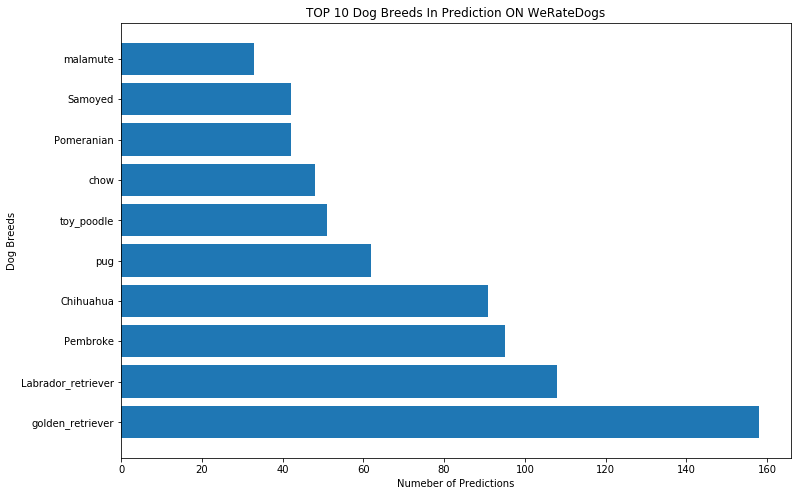

In [647]:
# 分析或可视化代码
fig = plt.figure(figsize=(12,8))
plt.barh(top10_breed.index, top10_breed)
plt.title('TOP 10 Dog Breeds In Prediction ON WeRateDogs')
plt.xlabel ('Numeber of Predictions')
plt.ylabel('Dog Breeds')


总结：

可以看出，在推文中，被预测最多的十个狗狗品种和预测数目为：

golden_retriever      158，
Labrador_retriever    108，
Pembroke               95，
Chihuahua              91，
pug                    62，
toy_poodle             51，
chow                   48，
Pomeranian             42，
Samoyed                42，
malamute               33。

2）哪些品种的狗狗最受欢迎？（favorite_count最高）

In [660]:
# 查看总体情况
twitter_clean.groupby('breed')['favorite_count'].describe()

count          mean           std      min  \
breed                                                                        
Afghan_hound                      3.0  17250.666667  10210.026118   7054.0   
Airedale                         12.0   5259.000000   6232.497398    221.0   
American_Staffordshire_terrier   16.0   9342.937500   8011.400880    492.0   
Appenzeller                       2.0   7316.000000   6699.129645   2579.0   
Australian_terrier                2.0  11088.500000  12526.396629   2231.0   
Bedlington_terrier                6.0  21169.500000  21524.756935   4213.0   
Bernese_mountain_dog             11.0   7257.818182   7815.852325    136.0   
Blenheim_spaniel                 10.0   9252.000000  12637.522463    325.0   
Border_collie                    12.0   8899.583333  11193.259818    752.0   
Border_terrier                    7.0  13528.571429   9140.931715   1850.0   
Boston_bull                      12.0   5268.166667   4741.711234   1299.0   
Bouvier_des_Flandres              1.0  17961.000000           NaN  17961.0   
Brabancon_griffon                 3.0    880.666667    320.537569    520.0   
Brittany_spaniel                  8.0   5356.250000   8020.260519    335.0   
Cardigan                         21.0  12789.714286  11335.320821    520.0   
Chesapeake_Bay_retriever         31.0  10053.516129  15547.254632    171.0   
Chihuahua                        91.0   8315.549451  14371.742933    131.0   
Dandie_Dinmont                    7.0   3449.714286   2658.245143    264.0   
Doberman                          9.0   7643.333333   7017.575650    892.0   
English_setter                    8.0   4836.125000   5820.432837     81.0   
English_springer                 10.0  14114.600000  33324.341151    465.0   
EntleBucher                       1.0   2671.000000           NaN   2671.0   
Eskimo_dog                       22.0  10644.636364  16276.545818    548.0   
French_bulldog                   31.0  18354.129032  21666.213865    337.0   
German_shepherd                  21.0  10317.333333   9073.634213    128.0   
German_short-haired_pointer       8.0   5938.750000   7916.068518    737.0   
Gordon_setter                     4.0   5506.000000   5732.151836    154.0   
Great_Dane                       11.0   6342.181818   3440.865031   2623.0   
Great_Pyrenees                   15.0  12404.666667  11260.755980   1406.0   
Greater_Swiss_Mountain_dog        3.0  10483.666667  10770.649067   1383.0   
Ibizan_hound                      5.0   3765.400000   3965.092281    237.0   
Irish_setter                      4.0  10539.750000   7158.050869   2616.0   
Irish_terrier                     6.0   6297.666667  10792.049920    329.0   
Irish_water_spaniel               3.0  16335.333333  12466.086649   2068.0   
Irish_wolfhound                   1.0   1527.000000           NaN   1527.0   
Italian_greyhound                17.0   8330.117647  18753.574486    183.0   
Japanese_spaniel                  1.0   1355.000000           NaN   1355.0   
Labrador_retriever              108.0  11757.138889  16578.602831    317.0   
Lakeland_terrier                 18.0  11749.833333  30477.393721    265.0   
Leonberg                          3.0  14870.000000  13447.917460   3150.0   
Lhasa                             5.0   2649.400000   1548.577186    160.0   
Maltese_dog                      19.0   2946.947368   2664.284300    152.0   
Mexican_hairless                  7.0  13558.142857  16414.155024   1425.0   
Newfoundland                      7.0   6835.857143   8302.986780    203.0   
Norfolk_terrier                   7.0   5635.571429   5133.090910   1147.0   
Norwegian_elkhound               11.0  11248.454545   7535.168404    896.0   
Norwich_terrier                   5.0  10762.400000  12502.449652    807.0   
Old_English_sheepdog             15.0   7806.133333   7111.761384   1225.0   
Pekinese                         14.0   6857.714286   5656.084204    472.0   
Pembroke                         95.0  10908.642105  1

Text(0.5, 0, 'Dog Breed')

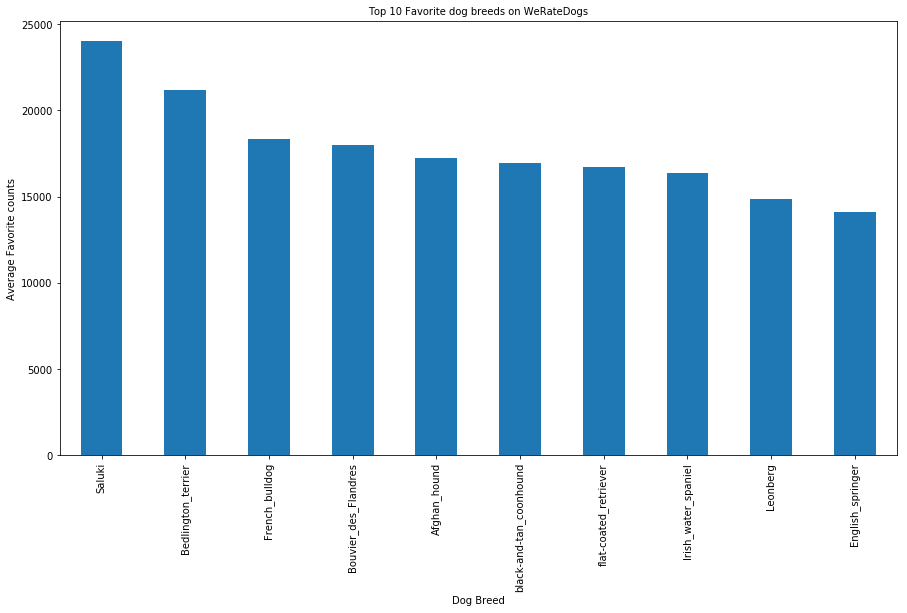

In [664]:
#分析并可视化：选取前10个品种
fig = plt.figure(figsize=(15,8))
twitter_clean.groupby('breed')['favorite_count'].mean().sort_values(ascending=False).nlargest(10).plot(kind='bar')
plt.title("Top 10 Favorite dog breeds on WeRateDogs",fontsize=10)
plt.ylabel("Average Favorite counts")
plt.xlabel("Dog Breed")

总结：

在狗狗的品种中，最受欢迎的是Saluki，前十名点赞数在表中可以查看，除了前两个品种点赞数较高外，其他8个品种的狗狗点赞数差别不大。

3）转推和喜欢的关系如何？

Text(0.5, 1.0, 'Relationship between Favorite_number and Retweet_number for dog stages')

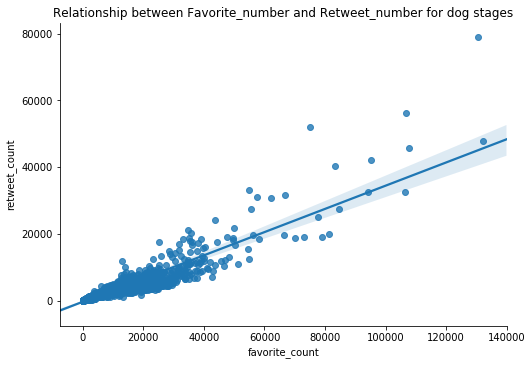

In [665]:
#分析大家对狗狗的转推（retweet）和喜欢（favorite）的关系如何？是不是喜欢才会转推？还是说两者没有关系？
sb.lmplot(x = 'favorite_count', y = 'retweet_count', data = twitter_clean, height = 5, aspect = 1.5)
plt.title('Relationship between Favorite_number and Retweet_number for dog stages')

总结：

人们对狗狗的喜爱和转推是高度相关的，也就是人们喜欢狗狗的话，一般也会转推，但喜欢的数量要大于转推，也就是说，喜欢的人中，有些人并不转推。

> 提示：在完成 Notebook 的所有内容之后，还需要完成两篇文本和图片组成的 PDF 报告。因为这两篇报告中只是文字和图片，不需要包含代码，你可以使用文字编辑软件，比如 Word 来完成：
- 创建一个 300-600 字的书面报告，命名为 `wrangle_report.pdf`，在该报告中简要描述你的数据整理过程。这份报告可以看作是一份内部文档，供你的团队成员查看交流。
- 创建一个 250 字以上的书面报告，命名为 `act_report.pdf`，在该报告中，你可以与读者交流观点，展示你使用整理过的数据生成的可视化图表。这份报告可以看作是一份外部文档，如博客帖子或杂志文章。

> 提示：提交项目前建议删除 Notebook 中的所有提示性文字和注释，只保留自己的 Markdown 文本和代码注释。